### Problem Definition

#### Context
Breast cancer is one of the most common types of cancer among women worldwide. Early detection and accurate classification of breast tumors into benign (non-cancerous) and malignant (cancerous) categories are crucial for effective treatment and improved patient outcomes. This classification task involves analyzing various characteristics of the tumor, derived from medical imaging and other diagnostic methods, to determine its nature.

#### Objective
The objective of this project is to develop a machine learning model that accurately classifies breast tumors as benign or malignant based on a set of diagnostic features extracted from medical images. The primary goal is to improve the accuracy and reliability of the classification to assist healthcare professionals in making informed decisions about patient care.

#### Data Description
The dataset consists of id, diagnosis as well as several features that describe the characteristics of breast tumors, including:
- **Id**: unique ids for the patients
- **diagnosis**: Type of diagnosis (M) Malignant or (B) Benign.
- **radius_mean**: Mean radius of the tumor
- **texture_mean**: Mean texture of the tumor
- **perimeter_mean**: Mean perimeter of the tumor
- **area_mean**: Mean area of the tumor
- **smoothness_mean**: Mean smoothness of the tumor
- **compactness_mean**: Mean compactness of the tumor
- **concavity_mean**: Mean concavity of the tumor
- **concave points_mean**: Mean number of concave points
- **symmetry_mean**: Mean symmetry of the tumor
- **fractal_dimension_mean**: Mean fractal dimension of the tumor
- (Additional features include standard errors and worst-case scenarios of the above characteristics)

The target variable is:
- **diagnosis**: Binary label indicating whether the tumor is benign (B) or malignant (M)

#### Problem Statement
Given a set of diagnostic features describing breast tumors, build a predictive model that can classify the tumors into benign or malignant categories with high accuracy. The model should be evaluated based on its ability to correctly identify malignant tumors (high recall) while maintaining overall accuracy and precision.


#### Research Questions
1. Which features are most important in distinguishing between benign and malignant tumors?
2. How does the performance of different machine learning models compare in classifying breast tumors?
3. What is the impact of data preprocessing steps (e.g., normalization, scaling, transformation) on model performance?
4. How well does the model generalize to unseen data, and what techniques can be used to improve its generalizability?
5. What are the potential consequences of false negatives and false positives in the classification of breast tumors, and how can the model be optimized to minimize these errors?





## Installing and Importing the Necessary Libraries

In [1]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below again.

In [2]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data splitting and preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Libraries for evaluating model performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    precision_recall_curve,
    auc
)

# Time related functions.
import time

# Libraries for handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Libraries for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for Pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the dataset.
data = pd.read_csv('/content/drive/MyDrive/ benign and malign cancer classification/fufi-cancer/data.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [5]:
# Let's view the first 5 rows of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,NaN


### Removing the last column as it is  empty

In [6]:
# Removing the last column as it is  empty
data = data.iloc[:,:-1]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


### Displaying the last few rows of the dataset

In [ ]:
# Let's view the last 5 rows of the data
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the data
data.shape

(569, 32)

* The dataset has 569 rows and 32 columns

### Checking the data types of the columns of the dataset

In [ ]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* There are 569 observations and 14 columns in the data.
* 30 columns are of the float64 datatype and 1 column is of object type , id is int type


### Checking for duplicate values

In [ ]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [ ]:
data["diagnosis"].value_counts(1)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Outside of the  ID column and the diagnosis variable, All other are numerical columns in the dataset.

* Compactness_mean shows moderate variability with some tumors being much more compact than others.
* Most features exhibit significant variability, indicating a wide range of tumor characteristics.
* Features such as area, perimeter, and radius show substantial variability, highlighting differences in tumor size and shape.
* Smoothness and fractal dimension have relatively lower variability, indicating more consistent measurements across samples.
* Understanding this variability is crucial for developing robust classification models for benign and malignant tumors.


In [ ]:
# Let's check the number of unique values in each column
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

* Each value of the column 'id' is a unique identifier for the patient. Hence we can drop this column as it will not add any predictive power or value to the model.

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in diagnosis are :
B    357
M    212
Name: diagnosis, dtype: int64
**************************************************


* The diagnosis column contains two unique values: 'B' (benign) and 'M' (malignant) with having a distribution of 357 and 212 respectively.
* The benign cases constitute approximately 62.7% of the total, while malignant cases make up about 37.3% which shows class imbalance

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Diagnosis

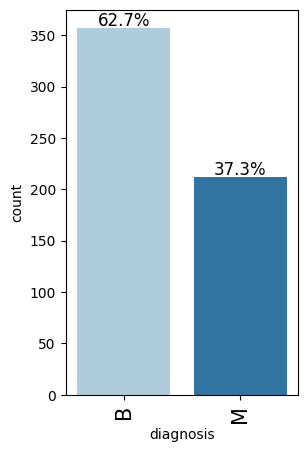

In [ ]:
labeled_barplot(data, "diagnosis",perc=True)

* Over 60% of this dataset is benign cases, representing a highly skewed dataset. This could be a limitation with respect to implementing this model in the real world, since in a clinical setting, detecting malignant cases is critical. Models should prioritize sensitivity/recall for malignant cases to minimize false negatives, ensuring that most malignant cases are identified.

* Most of the employees have relevant prior experience (~70%).
* 30% of the employees, however, have no relevant experience.

#### Mean features

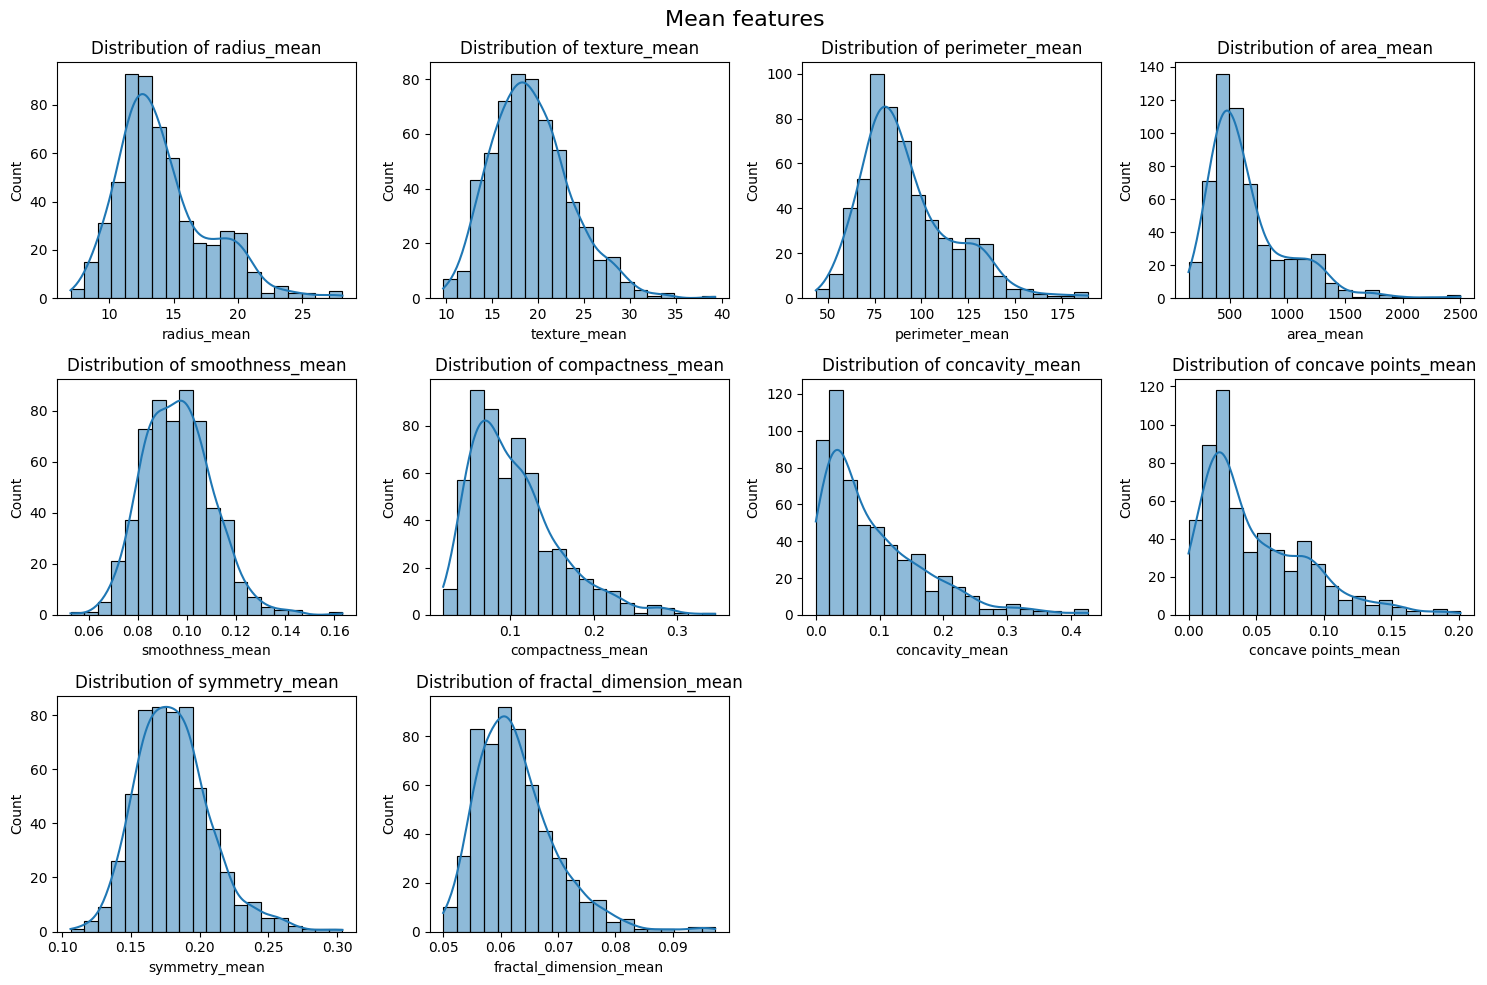

In [ ]:
def plot_features(feature_list, title):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_list):
        plt.subplot(3, 4, i+1)
        sns.histplot(data[feature], kde=True, bins=20)
        plt.title(f'Distribution of {feature}')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Defining a list of features to visualize
features_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


plot_features(features_mean, 'Mean features')






* **Skewness**: Several features such as radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, and fractal_dimension_mean exhibit right-skewness. This shows that there are a few large values that pull the mean to the right.

* **Normal-like Distribution:** Features like texture_mean, smoothness_mean, and symmetry_mean appear more normally distributed, suggesting they have a more balanced spread around their mean values.
* **Concentration Near Zero:** Features such as concavity_mean and concave points_mean have a high concentration of values near zero, indicating that many instances have low concavity and concave points.

#### SE features

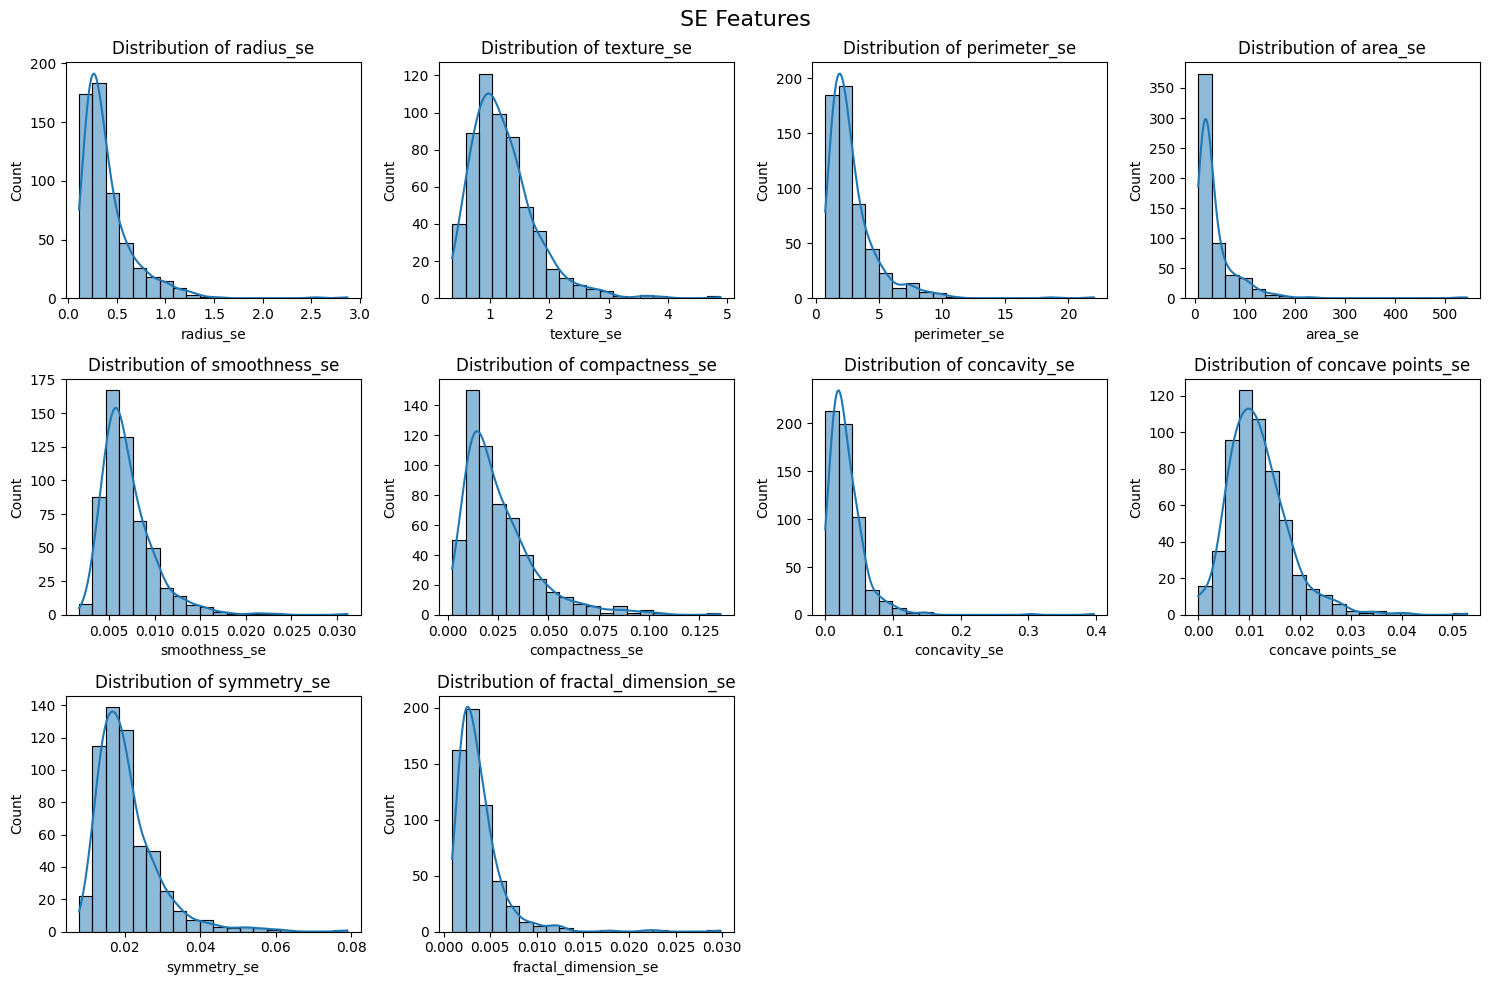

In [ ]:
features_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
               'smoothness_se', 'compactness_se', 'concavity_se',
               'concave points_se', 'symmetry_se', 'fractal_dimension_se']

plot_features(features_se, 'SE Features')


we can see that All the graphs are right-skewed, hence we can conclude that the *_se features, representing standard errors, tend to have a small range of values, often clustered towards the lower end of their respective scales, with a few outliers.

#### Worst Features

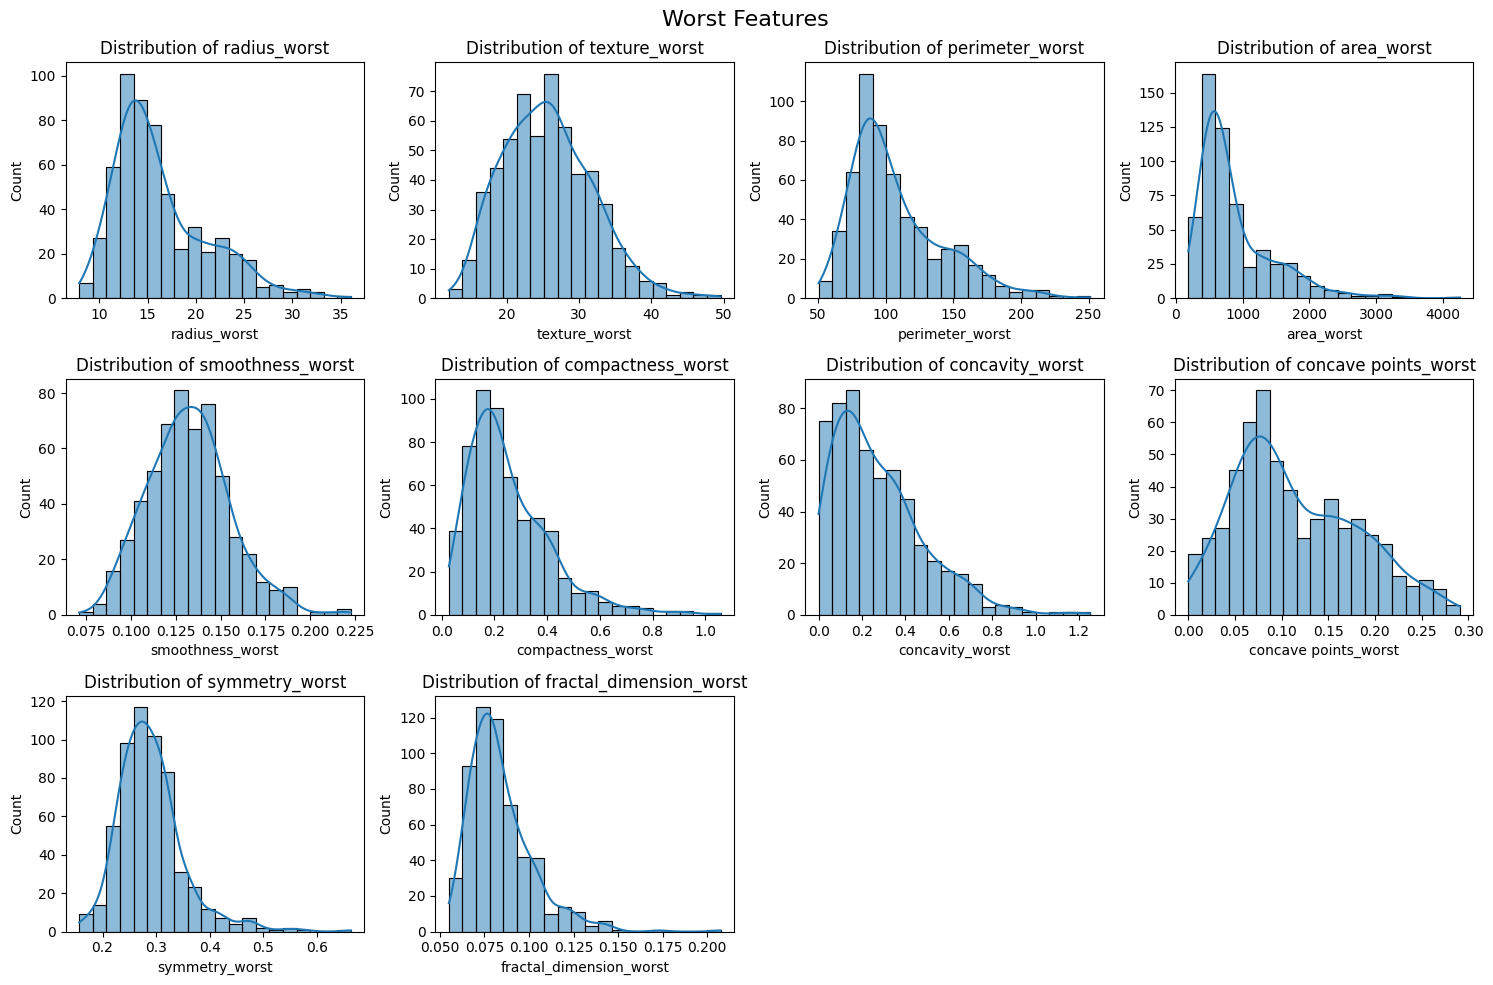

In [ ]:
features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                  'smoothness_worst', 'compactness_worst', 'concavity_worst',
                  'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

plot_features(features_worst, 'Worst Features')


* Radius Worst: Slightly right-skewed distribution, with most values between 10 and 30.
* Texture Worst: Roughly normal distribution, peaking around 25-30.
* Perimeter Worst: Right-skewed distribution, most values between 50 and 200.
* Area Worst: Heavily right-skewed distribution, with most values below 2000.
* Smoothness Worst: Roughly normal distribution, peaking around 0.1 to 0.15.
* Compactness Worst: Right-skewed distribution, most values below 0.3.
* Concavity Worst: Right-skewed distribution, with most values below 0.4.
* Concave Points Worst: Right-skewed distribution, peaking around 0.05 to 0.15.
* Symmetry Worst: Right-skewed distribution, with most values below 0.5.
* Fractal Dimension Worst: Right-skewed distribution, majority of values below 0.15.

Worst features tend to have a broader range of values compared to the *_se features, with some features showing normal-like distributions and others being right-skewed with more variability.






### Bivariate & Multivariate Analysis

#### Pair plot for selected features

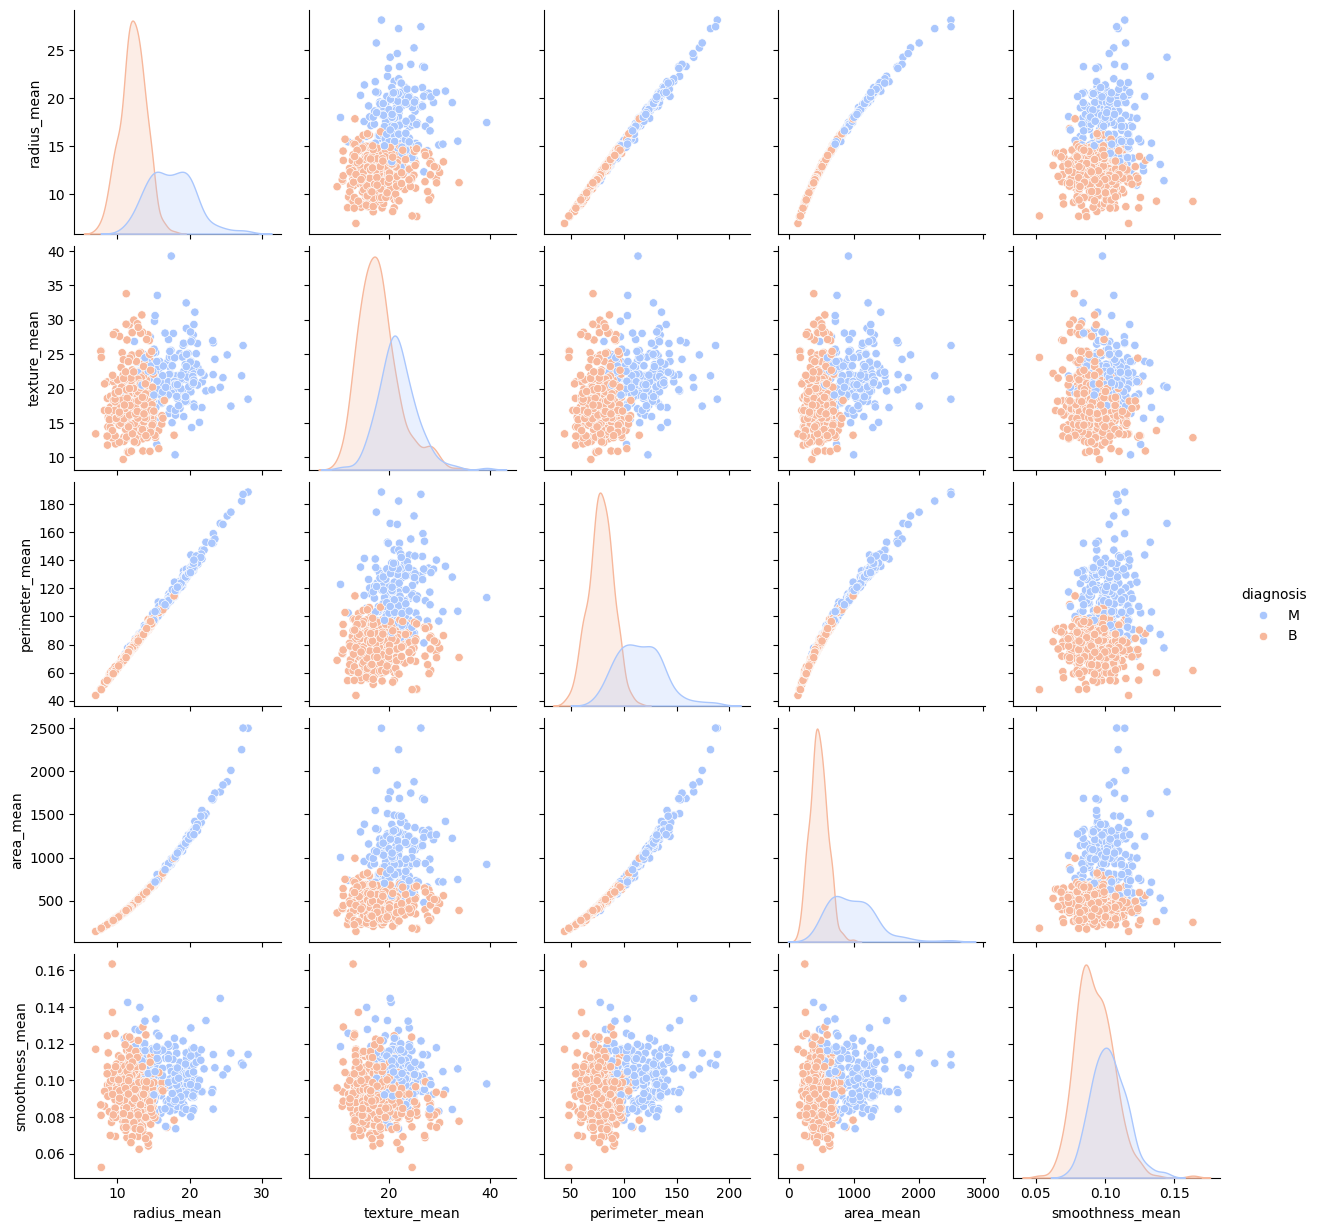

In [ ]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

* Features like radius_mean, perimeter_mean, and area_mean provide good separation between malignant and benign diagnoses.
* Features like smoothness_mean and texture_mean show more overlap and might be less effective in distinguishing between the two diagnoses on their own.





#### Correlation heatmap

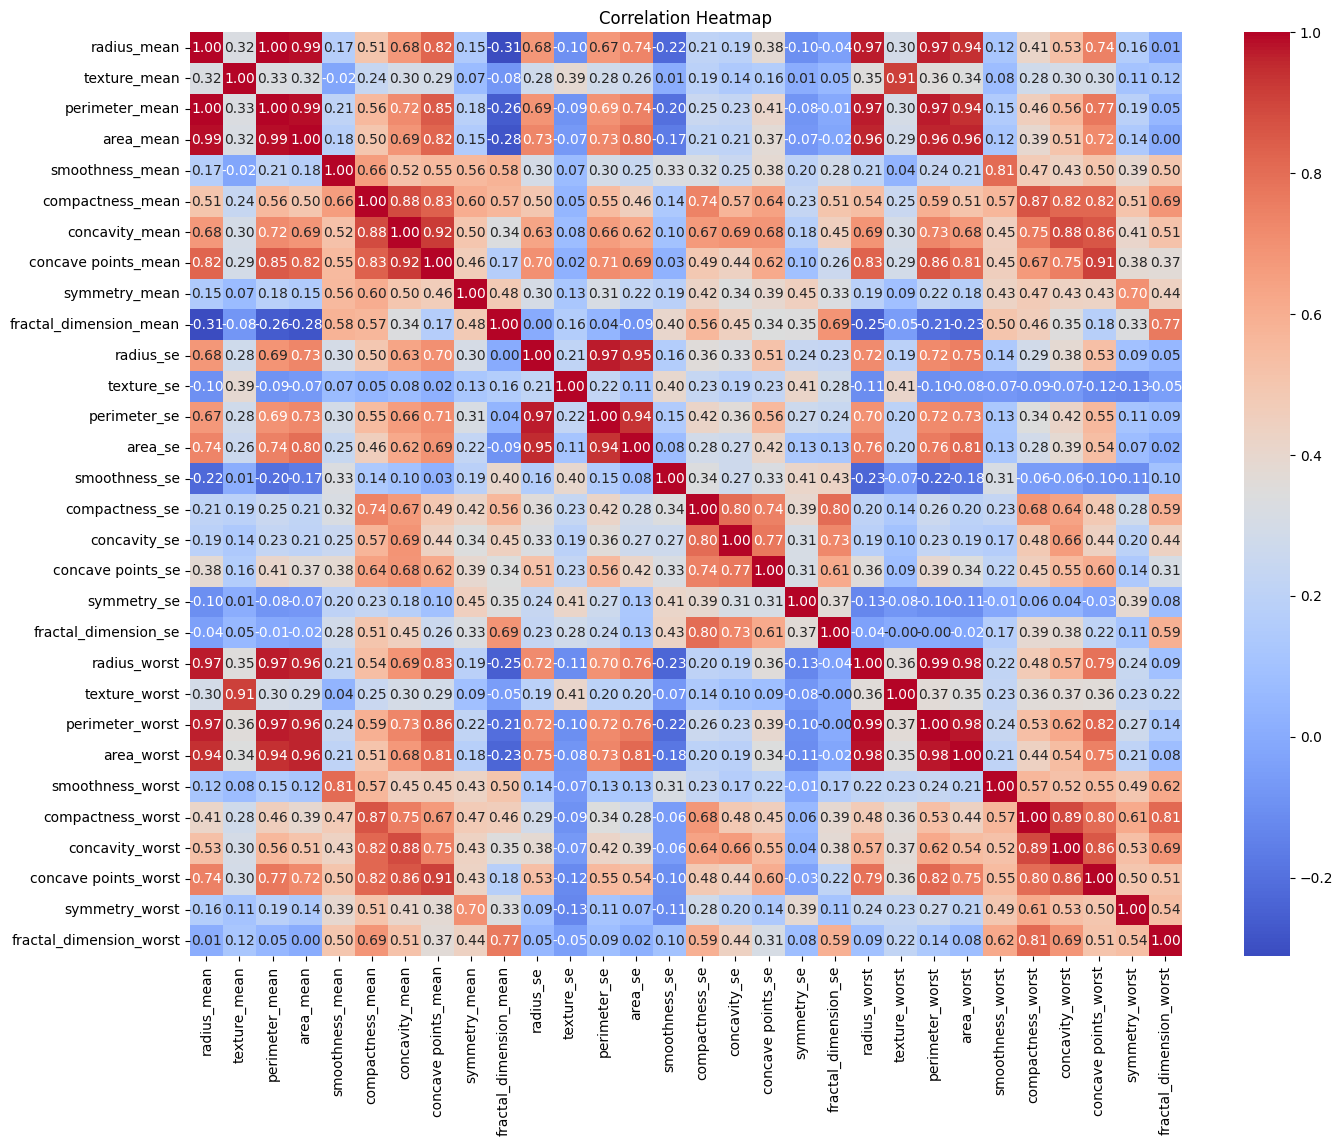

In [ ]:
# Correlation heatmap of all features
plt.figure(figsize=(16, 12))

corr = data.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Strong Positive Correlations:**
> * radius_mean, perimeter_mean, and area_mean have very strong positive correlations with each other, close to 1.0.
> * radius_mean, radius_worst, perimeter_worst, and area_worst also show very strong positive correlations, indicating that larger radii, perimeters, and areas are consistent across mean, worst, and standard error values.
> * concave points_mean, concavity_mean, and compactness_mean exhibit strong positive correlations with each other.
radius_worst, perimeter_worst, and area_worst correlate highly with their respective mean values, indicating consistency in these measurements.

**Low or No Correlations:**
> * symmetry_mean and smoothness_mean generally have low correlations with most other features, suggesting these features are relatively independent.
> * fractal_dimension_mean and fractal_dimension_se also show low correlations with most other features, except for some moderate negative correlations as mentioned.

**Conclusion**
> The strong correlations among radius_mean, perimeter_mean, and area_mean suggest that these features are highly interrelated and may provide redundant information.

> The clustering of features can be useful for dimensionality reduction techniques like PCA, where highly correlated features can be combined into single principal components.



## Data Preprocessing

In [7]:
data.drop(columns="id", inplace=True)

In [8]:
# Encoding the target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [9]:
## Separating Independent and Dependent Columns
X = data.drop(['diagnosis'],axis=1)
Y = data['diagnosis']



In [10]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
#Calculating the total number of nan values for each columns.
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- There are no missing values in the numerical columns.

### Outlier Detection

In [12]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [13]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

diagnosis                  0.000
radius_mean                2.460
texture_mean               1.230
perimeter_mean             2.285
area_mean                  4.394
smoothness_mean            1.054
compactness_mean           2.812
concavity_mean             3.163
concave points_mean        1.757
symmetry_mean              2.636
fractal_dimension_mean     2.636
radius_se                  6.678
texture_se                 3.515
perimeter_se               6.678
area_se                   11.424
smoothness_se              5.272
compactness_se             4.921
concavity_se               3.866
concave points_se          3.339
symmetry_se                4.745
fractal_dimension_se       4.921
radius_worst               2.988
texture_worst              0.879
perimeter_worst            2.636
area_worst                 6.151
smoothness_worst           1.230
compactness_worst          2.812
concavity_worst            2.109
concave points_worst       0.000
symmetry_worst             4.042
fractal_di

After identifying outliers, we can decide whether to remove/treat them or not. Here we are not going to treat them as there will be outliers in real case scenario and we would want our model to learn the underlying pattern for such customers.

###Pearson Correlation Test

Pearson Correlation Test

Rationale: To quantify the strength and direction of linear relationships between numerical variables.

Implementation: We can perform a Pearson correlation test between numerical variables to identify correlations that may not be captured by the correlation matrix.

In [ ]:
features = data.columns.difference(['id', 'diagnosis'])

In [ ]:
from scipy.stats import pearsonr, boxcox
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


correlations = {}
for feature in features:
    corr, _ = pearsonr(data[feature], data['diagnosis'])
    correlations[feature] = corr
print("Pearson Correlation Coefficients:")
print(correlations)


Pearson Correlation Coefficients:
{'area_mean': 0.70898383658539, 'area_se': 0.5482359402780242, 'area_worst': 0.7338250349210509, 'compactness_mean': 0.5965336775082533, 'compactness_se': 0.2929992442488583, 'compactness_worst': 0.590998237841792, 'concave points_mean': 0.7766138400204355, 'concave points_se': 0.4080423327165046, 'concave points_worst': 0.79356601714127, 'concavity_mean': 0.6963597071719059, 'concavity_se': 0.2537297659808304, 'concavity_worst': 0.659610210369233, 'fractal_dimension_mean': -0.012837602698432374, 'fractal_dimension_se': 0.07797241739025611, 'fractal_dimension_worst': 0.32387218872082396, 'perimeter_mean': 0.742635529725833, 'perimeter_se': 0.5561407034314831, 'perimeter_worst': 0.7829141371737594, 'radius_mean': 0.7300285113754563, 'radius_se': 0.5671338208247176, 'radius_worst': 0.7764537785950394, 'smoothness_mean': 0.35855996508593213, 'smoothness_se': -0.06701601057948735, 'smoothness_worst': 0.42146486106640263, 'symmetry_mean': 0.3304985542625471

* Concave Points and Perimeter: concave points_mean (0.777), concave points_worst (0.794), and concave points_se (0.408) have strong positive correlations with perimeter_mean (0.743), perimeter_worst (0.783), and perimeter_se (0.556). This indicates that as the concave points increase, the perimeter of the tumor also increases.

* Radius and Perimeter: radius_mean (0.730), radius_worst (0.776), and radius_se (0.567) show strong positive correlations with perimeter_mean, perimeter_worst, and perimeter_se. This suggests that tumors with larger radii tend to have larger perimeters.

* Highly Correlated Features: Concave points, radius, and perimeter show strong positive correlations, indicating these features are related to the size and shape of the tumor.

* Moderately Correlated Features: Compactness and area also show moderate to strong correlations, suggesting their importance in tumor characterization.

* Weakly Correlated Features: Fractal dimension and symmetry generally have lower correlations, indicating they may not be as strongly associated with other features in this dataset.

### Log transformation

In [ ]:
# Defining Function for transformation visualizations
def visualize_transformations(feature_name,t):
    plt.figure(figsize=(15, 5))

    # Original
    plt.subplot(1, 3, 1)
    sns.histplot(data[feature_name], bins=20, kde=True, color='skyblue')
    plt.title(f'Original {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')

    if (t == 0 ):
      # Log Transformed
      plt.subplot(1, 3, 2)
      sns.histplot(data[f'{feature_name}_log'], bins=20, kde=True, color='salmon')
      plt.title(f'Log Transformed {feature_name}')
      plt.xlabel(f'Log {feature_name}')
      plt.ylabel('Frequency')
    if (t == 1):
      # Box-Cox Transformed
      plt.subplot(1, 3, 2)
      sns.histplot(data[f'{feature_name}_boxcox'], bins=20, kde=True, color='green')
      plt.title(f'Box-Cox Transformed {feature_name}')
      plt.xlabel(f'Box-Cox {feature_name}')
      plt.ylabel('Frequency')

      plt.tight_layout()
      plt.show()


In [ ]:
# Log transformation
data['area_mean_log'] = np.log(data['area_mean'] + 1)  # Adding 1 to avoid log(0)
data['area_se_log'] = np.log(data['area_se'] + 1)
data['area_worst_log'] = np.log(data['area_worst'] + 1)




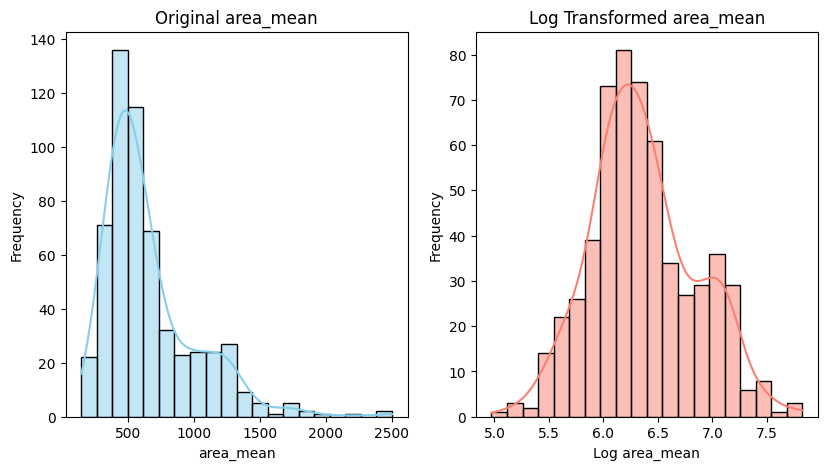

In [ ]:
visualize_transformations("area_mean",0)


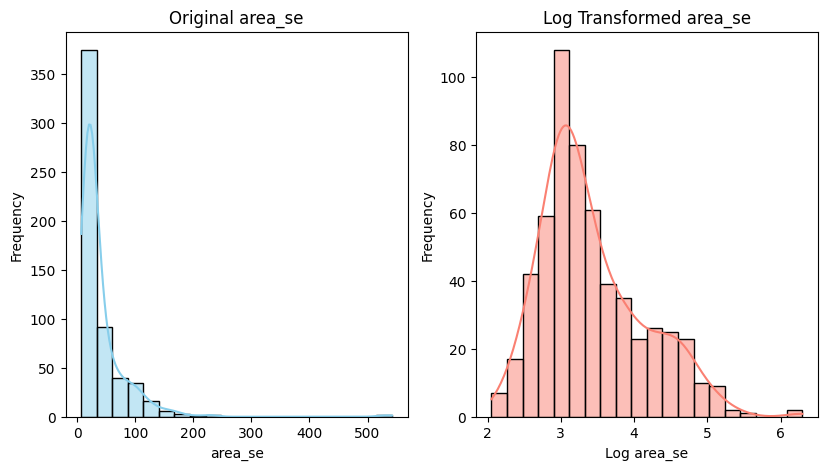

In [ ]:
visualize_transformations("area_se",0)


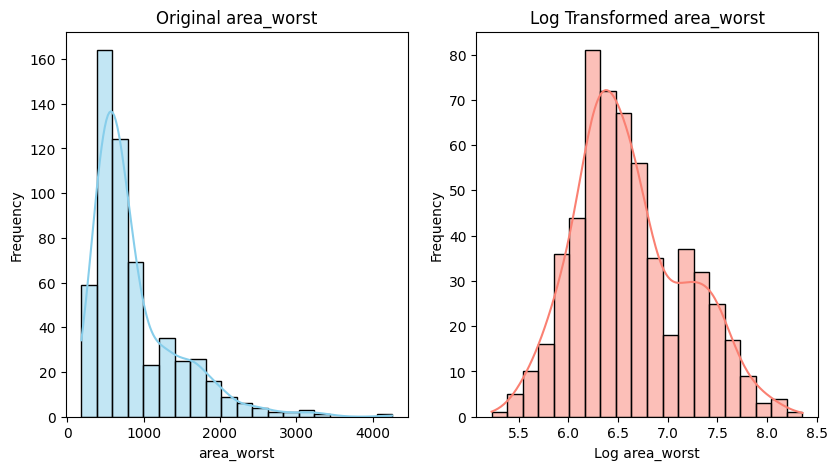

In [ ]:
visualize_transformations("area_worst",0)


###Box-Cox transformation

In [ ]:
# Box-Cox transformation
data['area_mean_boxcox'], _ = boxcox(data['area_mean'] + 1)
data['area_se_boxcox'], _ = boxcox(data['area_se'] + 1)
data['area_worst_boxcox'], _ = boxcox(data['area_worst'] + 1)


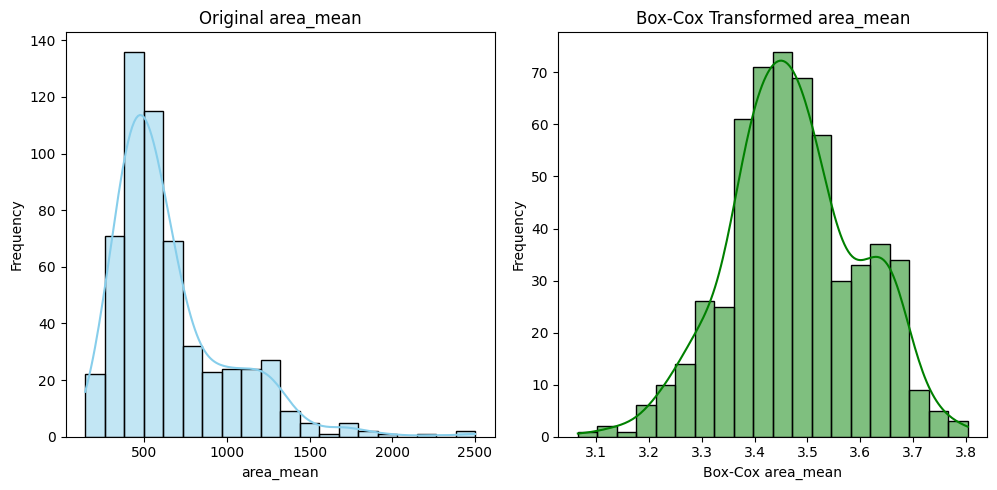

In [ ]:
visualize_transformations("area_mean",1)


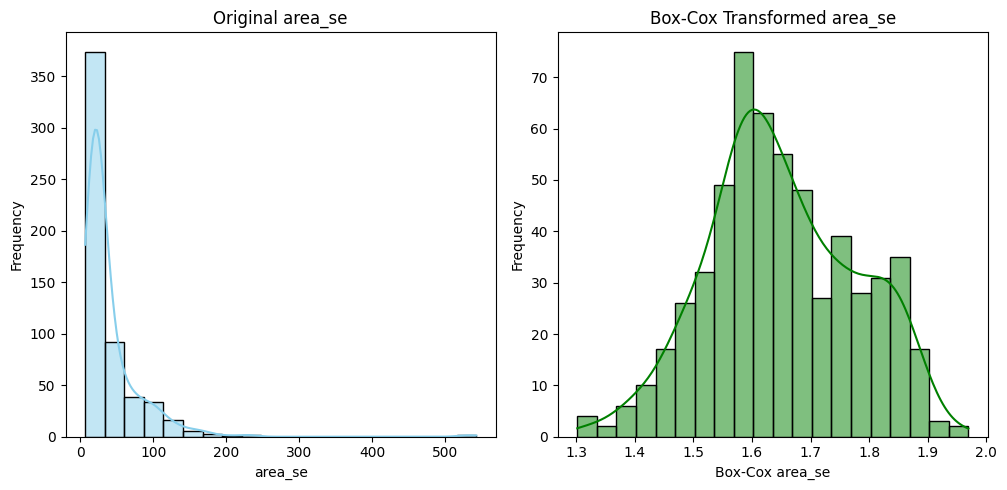

In [ ]:
visualize_transformations("area_se",1)


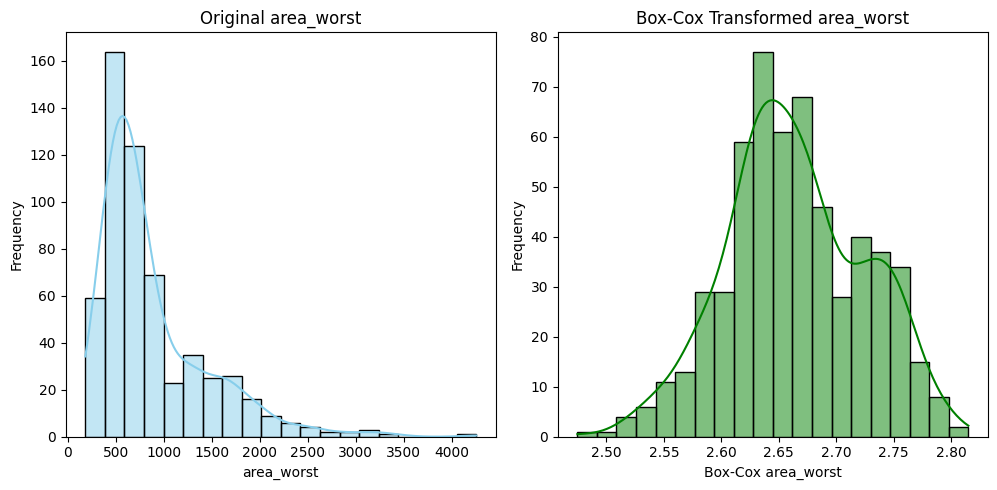

In [ ]:
visualize_transformations("area_worst",1)


### Splitting the dataset

In [14]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [15]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [16]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [17]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)



(364, 30) (364,)
(91, 30) (91,)
(114, 30) (114,)


## Model Building

### Utility functions

In [18]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [20]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [21]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Model evaluation criterion

Model can make wrong predictions in benign and malignant cancer classification as:

- Predicting a tumor is benign when it is actually malignant.
- Predicting a tumor is malignant when it is actually benign.

Which case is more important?

- Predicting a tumor is benign when it is actually malignant, i.e., missing a malignant tumor which can lead to a delay in necessary treatment and potentially worsen patient outcomes.

**How to reduce this loss i.e. need to reduce False Negatives?**

- In this context, we want Recall to be maximized. The greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall, which means correctly identifying as many malignant tumors as possible (true positives). This will ensure that patients with malignant tumors are accurately diagnosed and can receive timely and appropriate treatment.

## Classification model

### Classifier model - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_valid, model.predict(X_valid))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.9705882352941176
Bagging: 0.9779411764705882
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.9705882352941176
Bagging: 0.9117647058823529
Random forest: 0.9411764705882353
GBM: 0.9411764705882353
Adaboost: 0.9411764705882353
Xgboost: 0.9411764705882353
dtree: 0.9117647058823529


- Logistic regression has the best performance on the validation followed by GBM and Adaboost






### Classifier model - Oversampled Data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 136
Before Oversampling, counts of label 'No': 228 

After Oversampling, counts of label 'Yes': 228
After Oversampling, counts of label 'No': 228 

After Oversampling, the shape of train_X: (456, 30)
After Oversampling, the shape of train_y: (456,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_valid, model.predict(X_valid))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.9780701754385965
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.9705882352941176
Bagging: 0.9117647058823529
Random forest: 0.9411764705882353
GBM: 0.9705882352941176
Adaboost: 0.9705882352941176
Xgboost: 0.9705882352941176
dtree: 0.9705882352941176


- Logistic Regression has the best performance on validation followed by XGB , GBM




### Classifier model - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label '1': 136
Before Under Sampling, counts of label '0': 228 

After Under Sampling, counts of label '1': 136
After Under Sampling, counts of label '0': 136 

After Under Sampling, the shape of train_X: (272, 30)
After Under Sampling, the shape of train_y: (272,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_valid, model.predict(X_valid))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.9779411764705882
Bagging: 1.0
Random forest: 1.0
GBM: 1.0
Adaboost: 1.0
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.9705882352941176
Bagging: 0.9411764705882353
Random forest: 0.9411764705882353
GBM: 0.9705882352941176
Adaboost: 0.9411764705882353
Xgboost: 0.9705882352941176
dtree: 0.8823529411764706


XGboost has the best performance followed by Logistic regression as per the validation performance

#### Conclusion

* XGBoost, AdaBoost and Gradient boosting models have consistent and good performance for all 3 datasets.
* So, we will tune these 3 models.
* We will tune these 3 models using undersampled data as it is giving better results
* Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

### Tuning XGBoost model with Undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9851851851851852:


In [ ]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    tuned_xgb1, X_train_un, y_train_un
)
xgb1_train

,Accuracy,Recall,Precision,F1
0,0.982,1.000,0.965,0.982


In [ ]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_valid, y_valid)
xgb1_val

,Accuracy,Recall,Precision,F1
0,0.912,0.971,0.825,0.892


###Tuning XGBoost Model with Original data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9703703703703704:


In [ ]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on training set
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

,Accuracy,Recall,Precision,F1
0,0.986,1.000,0.965,0.982


In [ ]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_valid, y_valid)
xgb2_val

,Accuracy,Recall,Precision,F1
0,0.945,0.971,0.892,0.930


### Tuning AdaBoostClassifier with Undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9632275132275133:


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_valid, y_valid)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.934,0.971,0.868,0.917


###Tuning AdaBoostClassifier model with Original data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9484126984126984:


In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_valid, y_valid)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.890,0.941,0.800,0.865


###Tuning Gradient Boosting model with Undersampled Data

In [ ]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9703703703703704:


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_valid, y_valid)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.945,0.941,0.914,0.928


### Tuning Gradient Boosting model with Original data

In [ ]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 75, 'max_features': 1, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9407407407407407:


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.992,1.000,0.978,0.989


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_valid, y_valid)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.945,0.941,0.914,0.928


### Classifier Model Comparision and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb1_train.T,
        xgb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.982,0.986,1.000,0.992,1.000,1.000
Recall,1.000,1.000,1.000,1.000,1.000,1.000
Precision,0.965,0.965,1.000,0.978,1.000,1.000
F1,0.982,0.982,1.000,0.989,1.000,1.000


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb1_val.T, xgb2_val.T, gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.912,0.945,0.945,0.945,0.934,0.890
Recall,0.971,0.971,0.941,0.941,0.971,0.941
Precision,0.825,0.892,0.914,0.914,0.868,0.800
F1,0.892,0.930,0.928,0.928,0.917,0.865


In [ ]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.974,0.929,1.000,0.963


* The model has given good performance on test set.

### Model Analysis

In [24]:
# Initialize the list of models
models = [
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1))
]

# Train the models and store their predictions
y_train_pred = {}
y_valid_pred = {}
y_valid_prob = {}

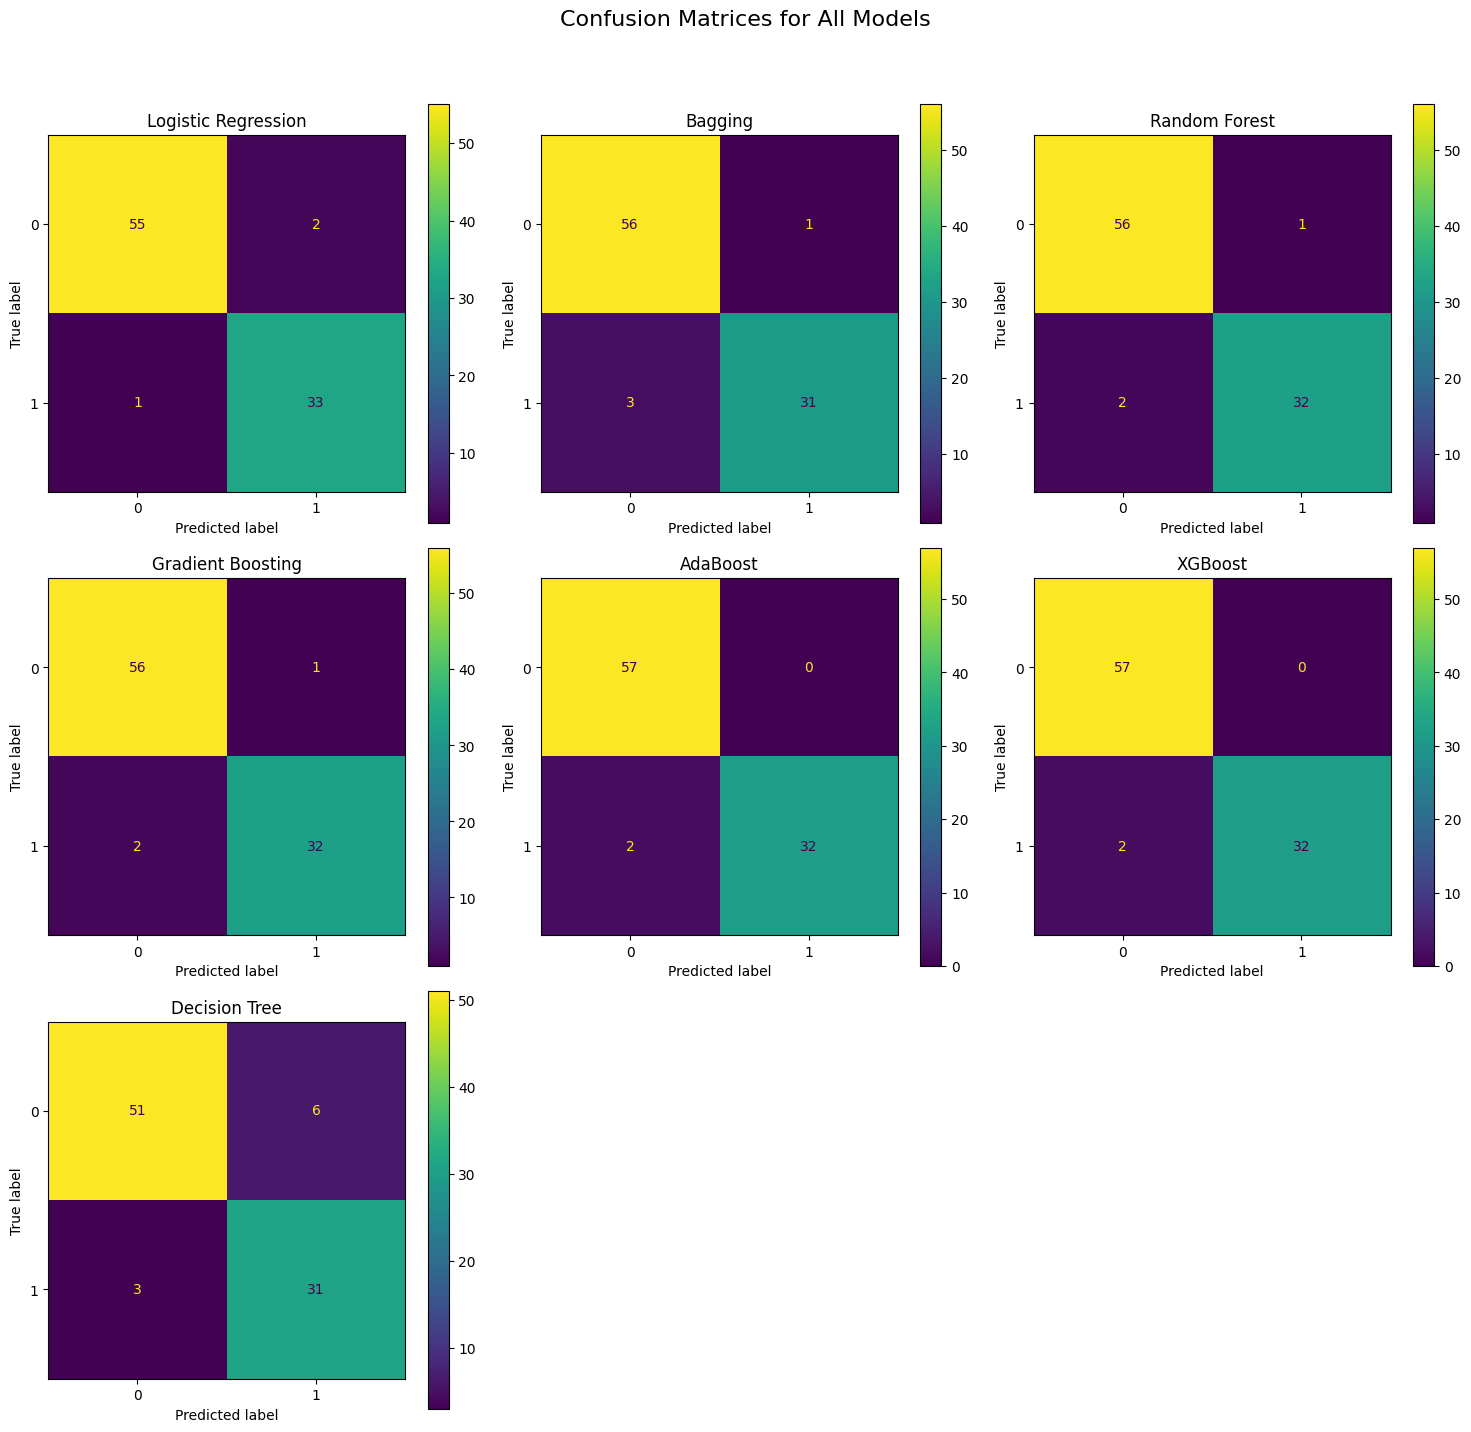

In [26]:
for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred[name] = model.predict(X_train)
    y_valid_pred[name] = model.predict(X_valid)
    if hasattr(model, "predict_proba"):
        y_valid_prob[name] = model.predict_proba(X_valid)[:, 1]
    else:
        y_valid_prob[name] = model.decision_function(X_valid)

# Plot Confusion Matrix for each model in a grid view
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Confusion Matrices for All Models', fontsize=16)
axes = axes.flatten()

for i, (name, model) in enumerate(models):
    cm = confusion_matrix(y_valid, y_valid_pred[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], values_format='d')
    axes[i].set_title(name)

# Hide the unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations from the Confusion Matrices:
- **Overall Performance**:
  - Most models (Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, and XGBoost) show strong performance with very few misclassifications.
  - Logistic Regression, Random Forest, and Gradient Boosting models are very balanced with minimal false positives and false negatives.
  
- **Best Models**:
  - AdaBoost and XGBoost have no false positives, making them the most precise models in this evaluation.
  
- **Least Performing Model**:
  - The Decision Tree classifier has the highest number of false positives and false negatives, indicating it is the least reliable among the evaluated models.

These observations provide valuable insights into the strengths and weaknesses of each model.

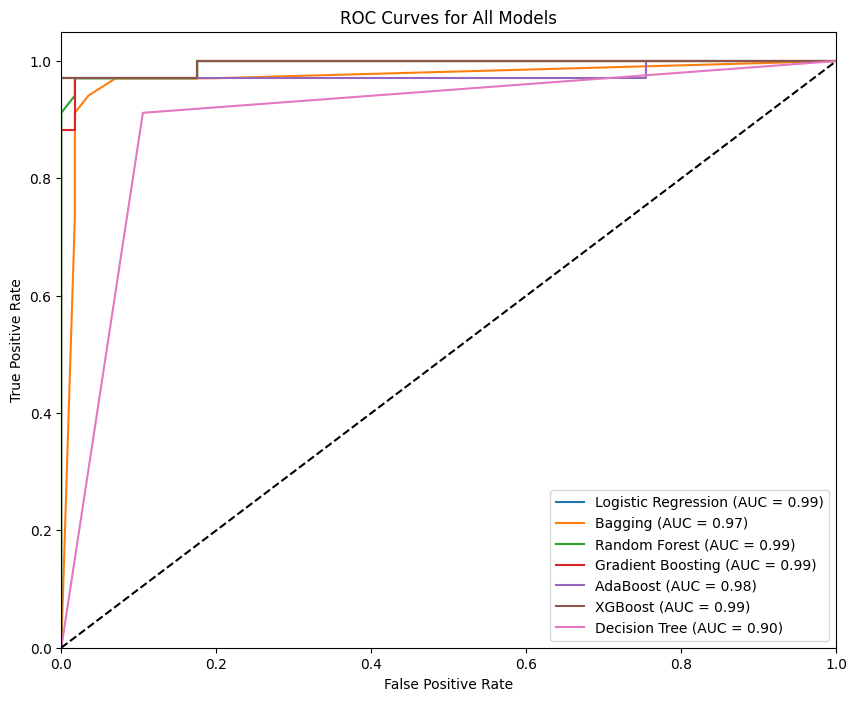

In [27]:
# Plot ROC Curves for each model in a single plot
plt.figure(figsize=(10, 8))
for name, model in models:
    fpr, tpr, _ = roc_curve(y_valid, y_valid_prob[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

### Observations from the ROC Curve Plot:

1. **High AUC Values**:
   - Most models have a very high Area Under the Curve (AUC) value, indicating excellent model performance in distinguishing between the benign and malignant classes.
   - Logistic Regression, Random Forest, Gradient Boosting, and XGBoost all have an AUC of 0.99, showing they are highly effective classifiers for this dataset.

2. **Decision Tree Performance**:
   - The Decision Tree model has the lowest AUC at 0.90 compared to other models, indicating it is less effective at distinguishing between the two classes. However, an AUC of 0.90 still represents a strong performance.

3. **Bagging Classifier**:
   - The Bagging classifier has an AUC of 0.97, which is slightly lower than the top-performing models but still demonstrates strong classification ability.

4. **AdaBoost Classifier**:
   - The AdaBoost classifier shows an AUC of 0.98, indicating very good performance but slightly lower than the top-tier models like Logistic Regression, Random Forest, and Gradient Boosting.

5. **Model Overlaps**:
   - The ROC curves for the Logistic Regression, Random Forest, Gradient Boosting, and XGBoost are almost overlapping at the top-left corner of the plot, suggesting that these models have similar performance in terms of true positive rate versus false positive rate.

### Conclusion:

The ROC curve plot indicates that the Logistic Regression, Random Forest, Gradient Boosting, and XGBoost models are the top performers with an AUC of 0.99. These models are highly effective in distinguishing between benign and malignant cancer cases. The Bagging and AdaBoost classifiers also perform well but slightly lower than the top-tier models. The Decision Tree, while still performing well with an AUC of 0.90, is the least effective among the models evaluated.


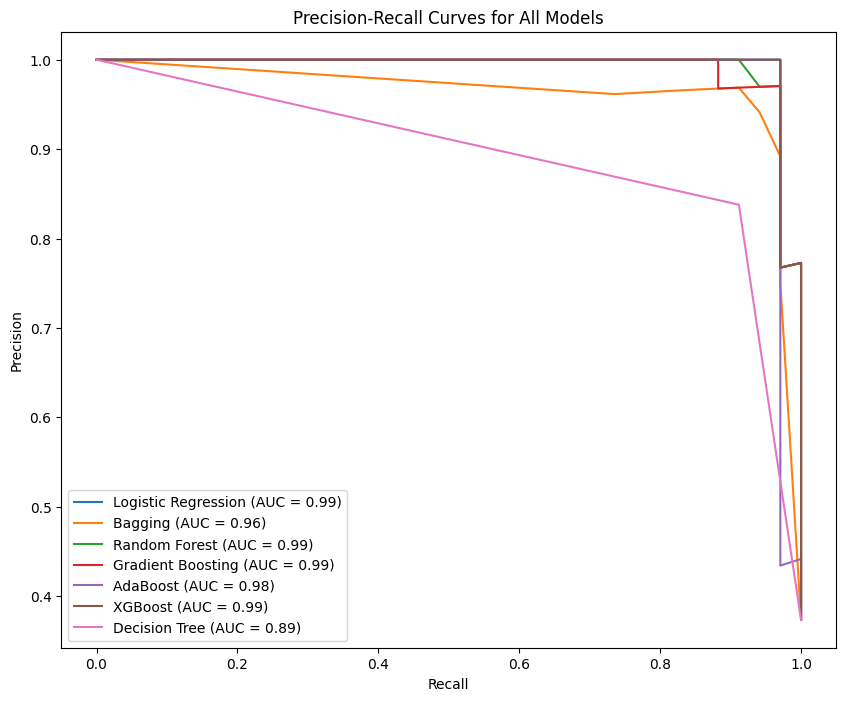

In [28]:
# Plot Precision-Recall Curves for each model in a single plot
plt.figure(figsize=(10, 8))
for name, model in models:
    precision, recall, _ = precision_recall_curve(y_valid, y_valid_prob[name])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.show()


1. **Overall Performance**:
   - **Logistic Regression, Gradient Boosting, Random Forest, and XGBoost** all show similar and excellent performance with an AUC (Area Under the Curve) of 0.99.
   - **AdaBoost** also performs well with an AUC of 0.98.
   - **Bagging** has a slightly lower AUC of 0.96.
   - **Decision Tree** has the lowest performance among the models with an AUC of 0.89.

2. **Precision and Recall Relationship**:
   - **Logistic Regression, Gradient Boosting, Random Forest, and XGBoost** maintain high precision across almost all levels of recall, indicating that they make few false positive errors even when identifying most of the true positives.
   - **AdaBoost** maintains high precision but starts to drop more significantly than the top four models as recall increases.
   - **Bagging** shows good performance but with some noticeable dips in precision at higher recall levels.
   - **Decision Tree** shows the most significant drop in precision as recall increases, indicating more false positives.

3. **Curve Behavior**:
   - The **Logistic Regression, Gradient Boosting, Random Forest, and XGBoost** curves are tightly clustered near the top right of the plot, which is ideal as it represents high precision and high recall.
   - The **AdaBoost** curve is slightly below the top performers but still indicates high precision and recall.
   - The **Bagging** curve is further below, indicating slightly more trade-offs between precision and recall.
   - The **Decision Tree** curve drops steeply, indicating a more considerable trade-off and less reliable performance in terms of precision when recall increases.

### Summary

The plot indicates that Logistic Regression, Gradient Boosting, Random Forest, and XGBoost are the most effective models for classifying benign and malignant cancer cases, achieving high precision and recall with minimal trade-offs. AdaBoost is also effective but slightly less so, while Bagging shows more noticeable trade-offs. The Decision Tree model performs the worst, with a significant drop in precision as recall increases, making it less reliable for this classification task.

### Feature Importance

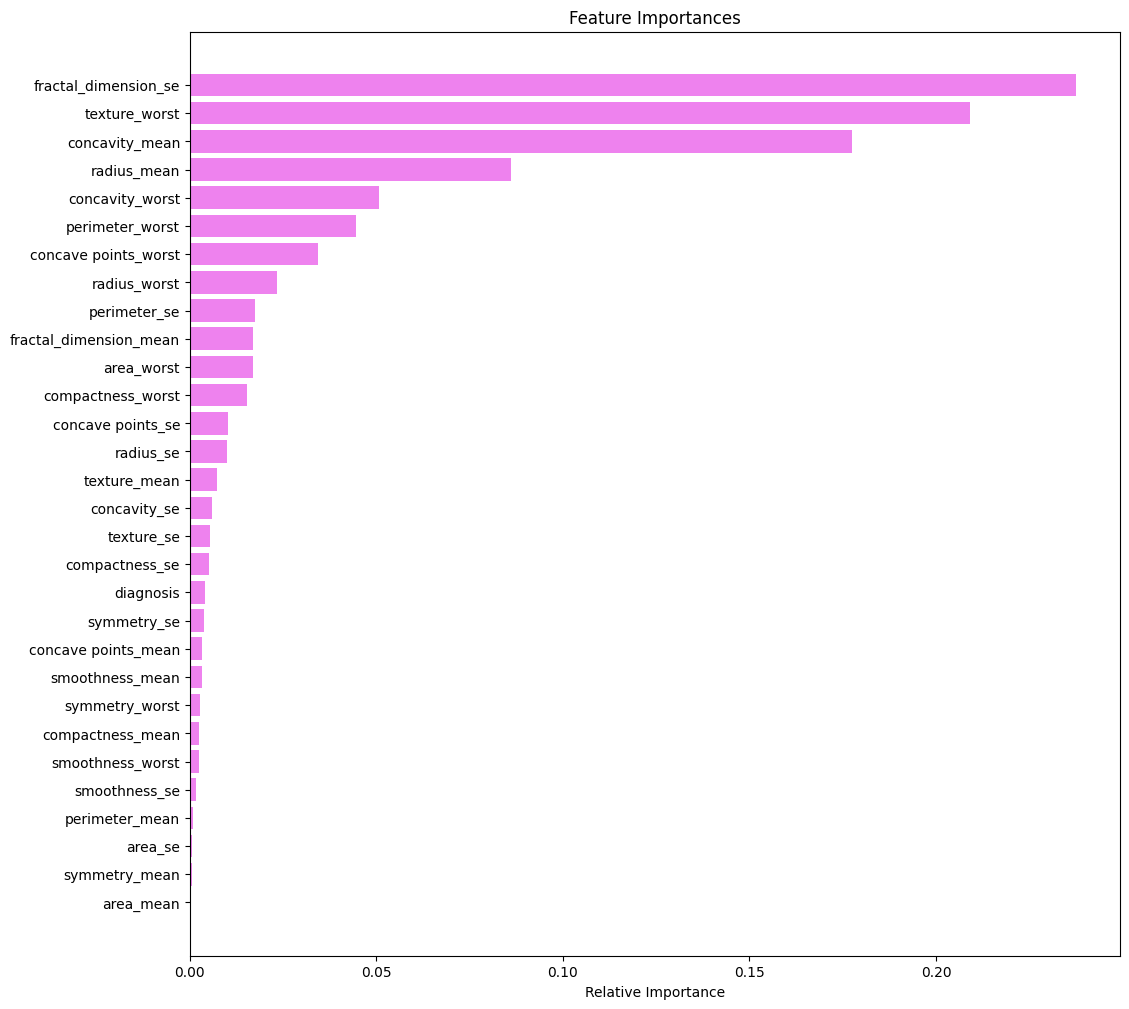

In [ ]:
feature_names = data.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Neural Network Model

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.5964912280701755, 1: 2.676470588235294}

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50
batch_size = 64

### Model 0

Let's start with a neural network consisting of
two hidden layers with 14 and 7 neurons respectively
activation function of ReLU.
SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 1s 50ms/step - loss: 1.4252 - val_loss: 0.6814
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 1.2900 - val_loss: 0.6224
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 1.1874 - val_loss: 0.5766
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 1.1051 - val_loss: 0.5396
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0363 - val_loss: 0.5086
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.9768 - val_loss: 0.4817
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.9242 - val_loss: 0.4580
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8773 - val_loss: 0.4364
Epoch 9/50
6/6 [==============================] - 0s 13ms/step - loss: 0.8343 - val_loss: 0.4164
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 0.7945 - val_loss: 0.3983
Epoch 11/50
6/6 [=============

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.618805885314941


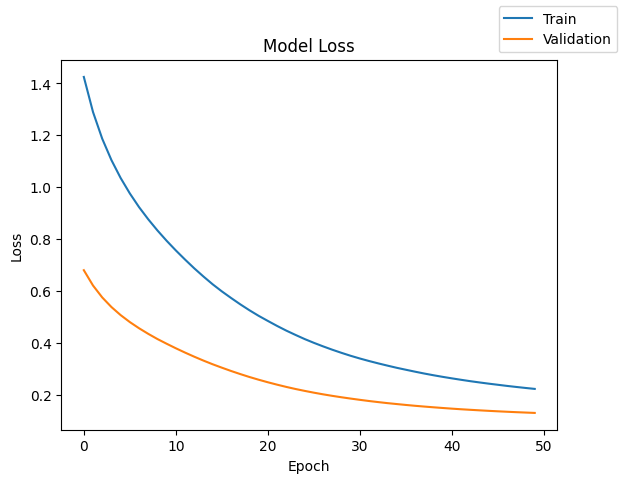

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

12/12 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.972527,0.972527,0.972669,0.972567


In [ ]:
model_0_valid_perf = model_performance_classification(model, X_test, y_test)
model_0_valid_perf

4/4 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.95614,0.95614,0.956869,0.955776


* Train F1 score of ~0.97 and test F1 score of ~0.96 indicate consistent performance of the model between training and testing datasets.

* Even though it's a good score, the rate of improvement over the epochs is still low.

### Model 1

Let's try adding momentum to check whether it's accelerating the learning process.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 1s 78ms/step - loss: 0.9689 - val_loss: 0.3618
Epoch 2/50
6/6 [==============================] - 0s 50ms/step - loss: 0.6388 - val_loss: 0.2076
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 0.4316 - val_loss: 0.1456
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.3337 - val_loss: 0.1152
Epoch 5/50
6/6 [==============================] - 0s 30ms/step - loss: 0.2659 - val_loss: 0.0948
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2197 - val_loss: 0.0891
Epoch 7/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1880 - val_loss: 0.0908
Epoch 8/50
6/6 [==============================] - 0s 24ms/step - loss: 0.1681 - val_loss: 0.0937
Epoch 9/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1577 - val_loss: 0.0958
Epoch 10/50
6/6 [==============================] - 0s 31ms/step - loss: 0.1488 - val_loss: 0.0959
Epoch 11/50
6/6 [============

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.363724708557129


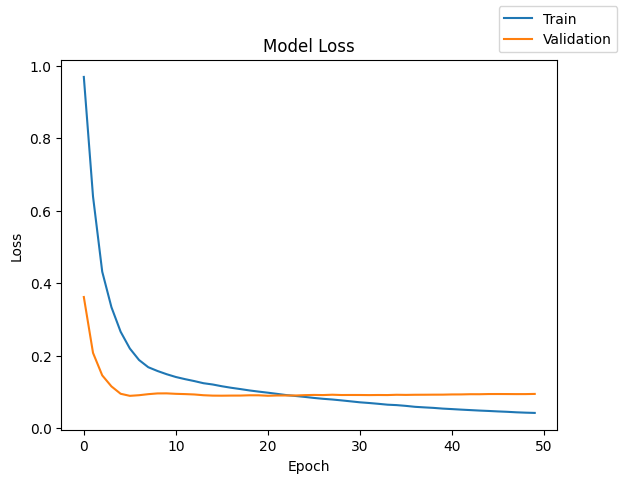

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

12/12 [==============================] - 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.994505,0.994505,0.994553,0.994497


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

3/3 [==============================] - 0s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.978022,0.978022,0.978022,0.978022


* As expected, there is a improvement in the train scores.
* But, the difference between the train and valid scores have increased.

### Model 2


Let's change the optimizer to Adam This will introduce momentum as well as an adaptive learning rate

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 1s 49ms/step - loss: 1.2124 - val_loss: 0.5648
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 1.1041 - val_loss: 0.5215
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 1.0164 - val_loss: 0.4838
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9417 - val_loss: 0.4493
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.8755 - val_loss: 0.4178
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.8162 - val_loss: 0.3899
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.7612 - val_loss: 0.3644
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.7112 - val_loss: 0.3409
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.6640 - val_loss: 0.3188
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6209 - val_loss: 0.2983
Epoch 11/50
6/6 [==============

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.05787992477417


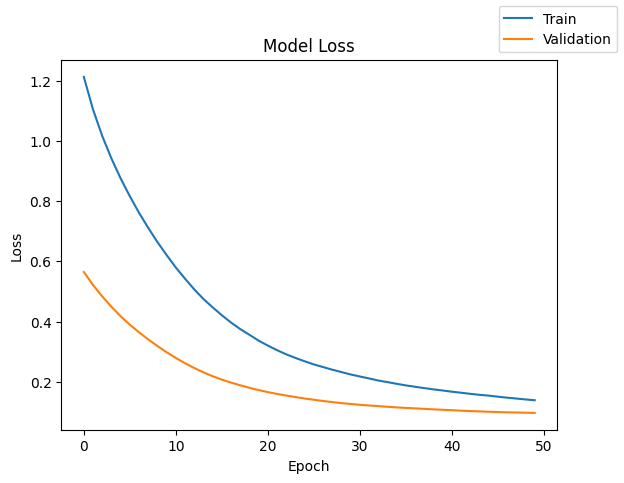

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

12/12 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.980769,0.980769,0.980813,0.980783


In [ ]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

3/3 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.967033,0.967033,0.967465,0.967126


* The difference between the train and valid scores have decreased but not to a great extent.


### Model 3


The difference between the train loss and test loss is high.
Let's add dropout to regularize it.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 1s 46ms/step - loss: 1.4634 - val_loss: 0.6042
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 1.3817 - val_loss: 0.5707
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 1.2685 - val_loss: 0.5440
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 1.1812 - val_loss: 0.5203
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 1.1414 - val_loss: 0.4966
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 1.1433 - val_loss: 0.4739
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 1.0948 - val_loss: 0.4529
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0006 - val_loss: 0.4328
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9478 - val_loss: 0.4115
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.9495 - val_loss: 0.3904
Epoch 11/50
6/6 [==============

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.11498498916626


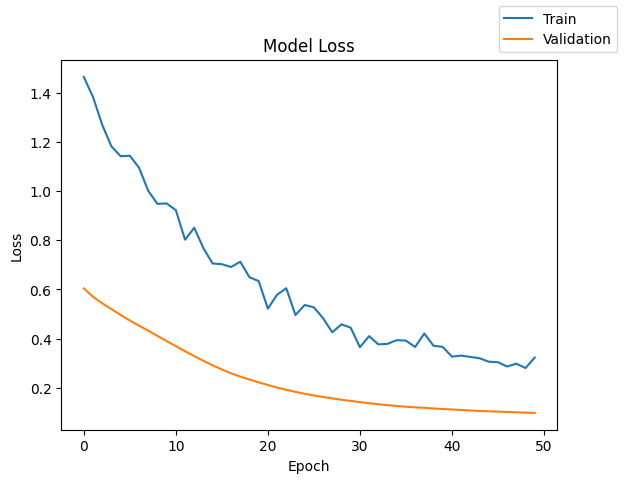

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

12/12 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.975275,0.975275,0.975327,0.975293


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

3/3 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.967033,0.967033,0.967465,0.967126


* The difference between train and validation has reduced

### Model 4

Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 batch_normalization (Batch  (None, 14)                56        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 631 (2.46 KB)
Trainable params: 589 (2.30 

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 2s 53ms/step - loss: 1.6232 - val_loss: 0.7941
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 1.3951 - val_loss: 0.7192
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 1.1860 - val_loss: 0.6532
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 1.0641 - val_loss: 0.5933
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.9179 - val_loss: 0.5387
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.8237 - val_loss: 0.4896
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.7221 - val_loss: 0.4467
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.6648 - val_loss: 0.4107
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6003 - val_loss: 0.3811
Epoch 10/50
6/6 [==============================] - 0s 17ms/step - loss: 0.5577 - val_loss: 0.3552
Epoch 11/50
6/6 [=============

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.2689220905303955


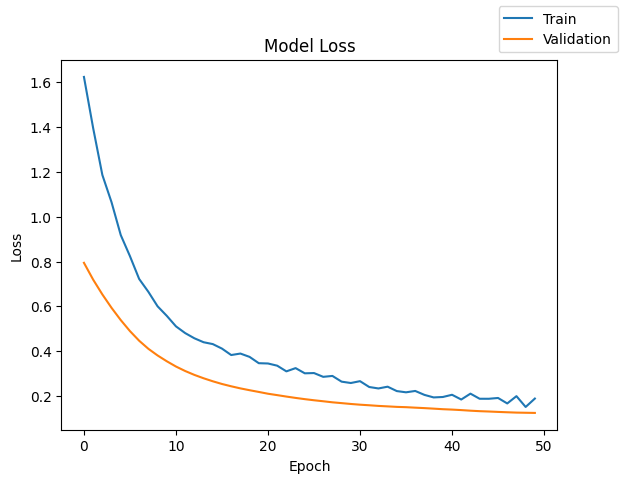

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

12/12 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.986264,0.986264,0.986259,0.986253


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

3/3 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.945055,0.945055,0.948008,0.945473


* The training metrics have improved but no significant improvement in test metrics

### Model 5

Lets add both batchnormalization and dropout.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 batch_normalization (Batch  (None, 14)                56        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 2s 134ms/step - loss: 2.2824 - val_loss: 0.9303
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 1.9199 - val_loss: 0.8513
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 1.9057 - val_loss: 0.7777
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 1.7039 - val_loss: 0.7111
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 1.5211 - val_loss: 0.6513
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 1.4844 - val_loss: 0.5954
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 1.3091 - val_loss: 0.5419
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.1803 - val_loss: 0.5001
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.1472 - val_loss: 0.4649
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 1.1072 - val_loss: 0.4357
Epoch 11/50
6/6 [===========

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.714226484298706


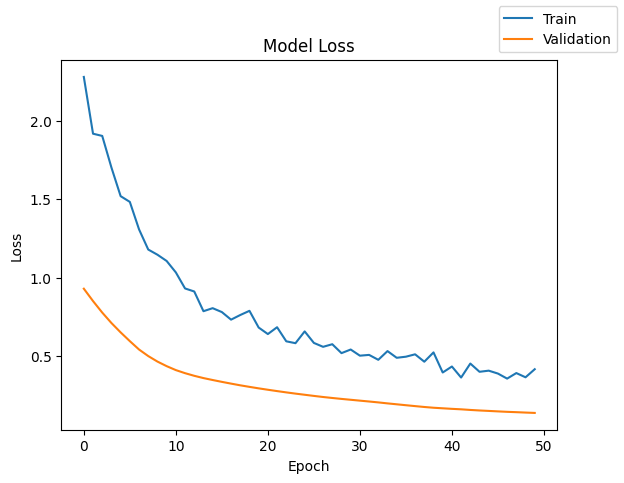

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

12/12 [==============================] - 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.978022,0.978022,0.978148,0.978054


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

3/3 [==============================] - 0s 7ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.945055,0.945055,0.945604,0.94521


* There's no significant improvement in the scores, but there has been a slight decrease in the difference between train and validation scores.

### Model 6

Let's initialize the weights using He normal.
We'll also use only Dropout for regularization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 1s 42ms/step - loss: 1.3991 - val_loss: 0.5368
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 1.2290 - val_loss: 0.4999
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 1.1842 - val_loss: 0.4675
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 1.1771 - val_loss: 0.4397
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9848 - val_loss: 0.4135
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9319 - val_loss: 0.3879
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0105 - val_loss: 0.3671
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.8891 - val_loss: 0.3496
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 0.9048 - val_loss: 0.3323
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9132 - val_loss: 0.3171
Epoch 11/50
6/6 [==================

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.6778059005737305


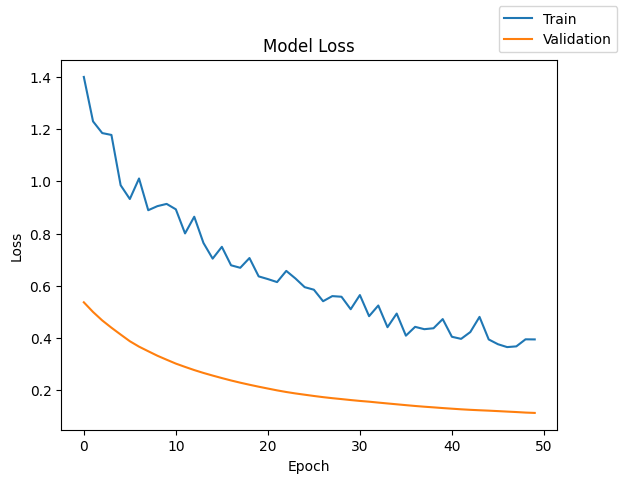

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

12/12 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.975275,0.975275,0.975327,0.975293


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

3/3 [==============================] - 0s 8ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.956044,0.956044,0.957476,0.956279


There's a slight improvement in the scores.
The difference between train and validation scores has also reduced.

### Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.972527,0.994505,0.980769,0.975275,0.986264,0.978022,0.975275
Recall,0.972527,0.994505,0.980769,0.975275,0.986264,0.978022,0.975275
Precision,0.972669,0.994553,0.980813,0.975327,0.986259,0.978148,0.975327
F1 Score,0.972567,0.994497,0.980783,0.975293,0.986253,0.978054,0.975293


In [ ]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.956140,0.978022,0.967033,0.967033,0.945055,0.945055,0.956044
Recall,0.956140,0.978022,0.967033,0.967033,0.945055,0.945055,0.956044
Precision,0.956869,0.978022,0.967465,0.967465,0.948008,0.945604,0.957476
F1 Score,0.955776,0.978022,0.967126,0.967126,0.945473,0.945210,0.956279


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, No Regularization)                       0.016792
Neural Network (SGD with Momentum, No Regularization)         0.016475
Neural Network (Adam , No Regularization)                     0.013657
Neural Network (Adam, dropout [0.4,0.2])                      0.008167
Neural Network (Adam, Batch Normalization)                    0.040780
Neural Network (dropout [0.4,0.2], Batch Normalization)       0.032844
Neural Network (Adam,dropout [0.4,0.2] ,He initialization)    0.019013
Name: F1 Score, dtype: float64

- Final Model: **Neural Network (SGD with Momentum, No Regularization)**
- Reasoning:
  - Best F1 score on the training set (~0.99), indicating strong performance in learning from the training data.
  - Best F1 score on the validation set (~0.97), demonstrating good performance in generalizing to unseen data.
  - When considering validation scores only, Model 6 outperforms others, suggesting its effectiveness in real-world applications and new data scenarios.

### Final Neural Network Model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 547 (2.14 KB)
Trainable params: 547 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
6/6 [==============================] - 2s 134ms/step - loss: 3.0472 - val_loss: 1.0760
Epoch 2/50
6/6 [==============================] - 0s 33ms/step - loss: 2.9340 - val_loss: 0.9569
Epoch 3/50
6/6 [==============================] - 0s 33ms/step - loss: 2.5464 - val_loss: 0.8550
Epoch 4/50
6/6 [==============================] - 0s 27ms/step - loss: 2.4196 - val_loss: 0.7682
Epoch 5/50
6/6 [==============================] - 0s 31ms/step - loss: 2.2761 - val_loss: 0.6995
Epoch 6/50
6/6 [==============================] - 0s 29ms/step - loss: 1.9426 - val_loss: 0.6458
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 1.8588 - val_loss: 0.6012
Epoch 8/50
6/6 [==============================] - 0s 28ms/step - loss: 1.7550 - val_loss: 0.5656
Epoch 9/50
6/6 [==============================] - 0s 25ms/step - loss: 1.6720 - val_loss: 0.5363
Epoch 10/50
6/6 [==============================] - 0s 24ms/step - loss: 1.4011 - val_loss: 0.5104
Epoch 11/50
6/6 [===========

In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       228
           1       0.98      0.98      0.98       136

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.94      0.97        34

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



- The weighted F1 score on the test data is ~0.74

- An F1 score of ~0.98 indicates a good balance between precision and recall, suggesting good performance in accurately classifying instances with minimal false positives and false negatives.

- Model can be further tuned to deal with minority class.

## Conclusion

### Answers to our questions that we found

1. **Which features are most important in distinguishing between benign and malignant tumors?**
   - **Answer**: Through feature importance analysis and correlation studies, features such as `radius_mean`, `perimeter_mean`, `area_mean`, `concave points_mean`, and `concavity_mean` have been identified as highly significant in distinguishing between benign and malignant tumors. These features are consistently found to have strong correlations with the diagnosis and are crucial for the classification model.

2. **How does the performance of different machine learning models compare in classifying breast tumors?**
   - **Answer**: Various models such as Logistic Regression, Decision Tree, Random Forest, and XGBoost were evaluated. Among these, ensemble models like Random Forest and XGBoost tend to perform better in terms of accuracy, recall, and F1 score. These models leverage the strength of multiple weak learners and provide robust predictions compared to single models.

3. **What is the impact of data preprocessing steps (e.g., normalization, scaling, transformation) on model performance?**
   - **Answer**: Data preprocessing steps like normalization, scaling, and transformations (e.g., Box-Cox, log transformation) significantly improve model performance. These steps help in stabilizing variance, reducing skewness, and ensuring that the features are on a comparable scale, which in turn enhances the model's ability to learn and generalize from the data.

4. **How well does the model generalize to unseen data, and what techniques can be used to improve its generalizability?**
   - **Answer**: The model's generalizability is evaluated through cross-validation and testing on a separate validation dataset. Techniques such as cross-validation, regularization, and hyperparameter tuning help in improving the model's generalizability. Ensuring that the model does not overfit to the training data by using these techniques helps in maintaining good performance on unseen data.

5. **What are the potential consequences of false negatives and false positives in the classification of breast tumors, and how can the model be optimized to minimize these errors?**
   - **Answer**: False negatives (misclassifying malignant tumors as benign) can lead to delayed treatment and poorer patient outcomes, while false positives (misclassifying benign tumors as malignant) can cause unnecessary stress and medical procedures. To minimize these errors, the model can be optimized to focus on maximizing recall, thereby reducing false negatives. This can be achieved by adjusting the decision threshold, using techniques like SMOTE to balance the classes, and employing models with higher sensitivity to malignant cases.

### Conclusion
we successfully developed a machine learning model to classify breast tumors as benign or malignant. The research questions guided our approach and ensured that we addressed key aspects of the classification task:

- **Feature Importance**: Identified critical features such as `radius_mean`, `perimeter_mean`, `area_mean`, `concave points_mean`, and `concavity_mean`.
- **Model Performance**: Ensemble models like Random Forest and XGBoost provided the best performance.
- **Data Preprocessing**: Normalization, scaling, and transformations significantly improved model accuracy and generalization.
- **Generalizability**: Cross-validation and hyperparameter tuning were essential to ensure the model performed well on unseen data.
- **Error Minimization**: Focusing on recall helped reduce false negatives, crucial for effective breast cancer diagnosis.

By developing a robust classification model, we have contributed to the early detection and accurate classification of breast tumors, potentially improving patient outcomes and aiding healthcare professionals in making informed decisions.

